# This notebook contains your standard data exploration

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np

In [61]:
data = pd.read_csv('./scrapers/asuntojen-hintatiedot/scraped_data/2021-04-16.csv')

In [62]:
data

,neighborhood,room_arrangement,house_type,square_meters,price_including_loans,price_per_square_meters,built_in,floor,has_elevator,shape,lot,energy_classification
0,Kivenlahti,AH,apartment,12.0,20000,1667,2020,1/3,True,good,rented,B-2018
1,Tapiola,"1h,kt,lasitettu...",apartment,35.0,308000,8800,2021,6/10,True,good,owned,B
2,Tapiola,"1h,kt.lasitettu...",apartment,35.0,299950,8570,2021,5/10,True,good,owned,B
3,Tapiola,"1h,kt,lasitettu...",apartment,35.0,316750,9050,2021,7/10,True,good,owned,B
4,Tapiola,"1h,kt,lasitettu...",apartment,35.0,325500,9300,2021,8/10,True,good,owned,B
...,...,...,...,...,...,...,...,...,...,...,...,...
1569,NaN,4h+k+khh+s+aula...,townhouse,169.0,420000,2485,1989,1/2,False,satisfactory,owned,D-2018
1570,NaN,"4h,k,khh,sauna ...",townhouse,79.0,425000,5380,2004,1/2,False,good,owned,NaN
1571,NaN,"3-4h, k ja saun...",townhouse,150.0,365000,2433,1952,1/3,False,good,owned,D-2018
1572,NaN,"5-6 h, k, s, kp...",townhouse,137.5,412000,2996,2000,1/2,False,satisfactory,owned,E-2013


## Data wrangling happens here

In [89]:
def get_number_of_rooms(data):
    room_arrangement = data["room_arrangement"]
    if not type(room_arrangement) == str:
        return 0
    if (room_arrangement == 'AH'):
        # AH = asuinhuoneisto = single room, no toilet/kitchen/etc, use special value
        return 0.5
    variable_rooms_regexp = re.compile('([0-9])-([0-9])\s?h', re.IGNORECASE)
    variable_rooms = variable_rooms_regexp.findall(room_arrangement)
    if len(variable_rooms) > 0:
        return ((int(variable_rooms[0][0]) + int(variable_rooms[0][1])) / 2)
    simple_rooms_regexp = re.compile('([0-9])\s?h', re.IGNORECASE)
    simple_rooms = simple_rooms_regexp.findall(room_arrangement)
    if len(simple_rooms) > 0:
        return int(simple_rooms[0])
    return 0

In [90]:
data["has_elevator"] * 1

0       1
1       1
2       1
3       1
4       1
       ..
1569    0
1570    0
1571    0
1572    0
1573    0
Name: has_elevator, Length: 1574, dtype: int64

In [91]:
data["number_of_rooms"] = data.apply(get_number_of_rooms, axis=1)
data["shape_is_good"] = (data["shape"] == 'good') * 1
data["has_elevator"] = data["has_elevator"] * 1
data["age"] = datetime.today().year - data["built_in"]
data["is_apartment"] = (data["house_type"] == "apartment") * 1
data["is_rowhouse"] = (data["house_type"] == "rowhouse") * 1
data["is_townhouse"] = (data["house_type"] == "townhouse") * 1
data["lot_is_owned"] = (data["lot"] == "owned") * 1
data

,neighborhood,room_arrangement,house_type,square_meters,price_including_loans,price_per_square_meters,built_in,floor,has_elevator,shape,lot,energy_classification,number_of_rooms,shape_is_good,age,is_apartment,is_rowhouse,is_townhouse,lot_is_owned
0,Kivenlahti,AH,apartment,12.0,20000,1667,2020,1/3,1,good,rented,B-2018,0.5,1,1,1,0,0,0
1,Tapiola,"1h,kt,lasitettu...",apartment,35.0,308000,8800,2021,6/10,1,good,owned,B,1.0,1,0,1,0,0,1
2,Tapiola,"1h,kt.lasitettu...",apartment,35.0,299950,8570,2021,5/10,1,good,owned,B,1.0,1,0,1,0,0,1
3,Tapiola,"1h,kt,lasitettu...",apartment,35.0,316750,9050,2021,7/10,1,good,owned,B,1.0,1,0,1,0,0,1
4,Tapiola,"1h,kt,lasitettu...",apartment,35.0,325500,9300,2021,8/10,1,good,owned,B,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,NaN,4h+k+khh+s+aula...,townhouse,169.0,420000,2485,1989,1/2,0,satisfactory,owned,D-2018,4.0,0,32,0,0,1,1
1570,NaN,"4h,k,khh,sauna ...",townhouse,79.0,425000,5380,2004,1/2,0,good,owned,NaN,4.0,1,17,0,0,1,1
1571,NaN,"3-4h, k ja saun...",townhouse,150.0,365000,2433,1952,1/3,0,good,owned,D-2018,3.5,1,69,0,0,1,1
1572,NaN,"5-6 h, k, s, kp...",townhouse,137.5,412000,2996,2000,1/2,0,satisfactory,owned,E-2013,5.5,0,21,0,0,1,1


## Visualize data

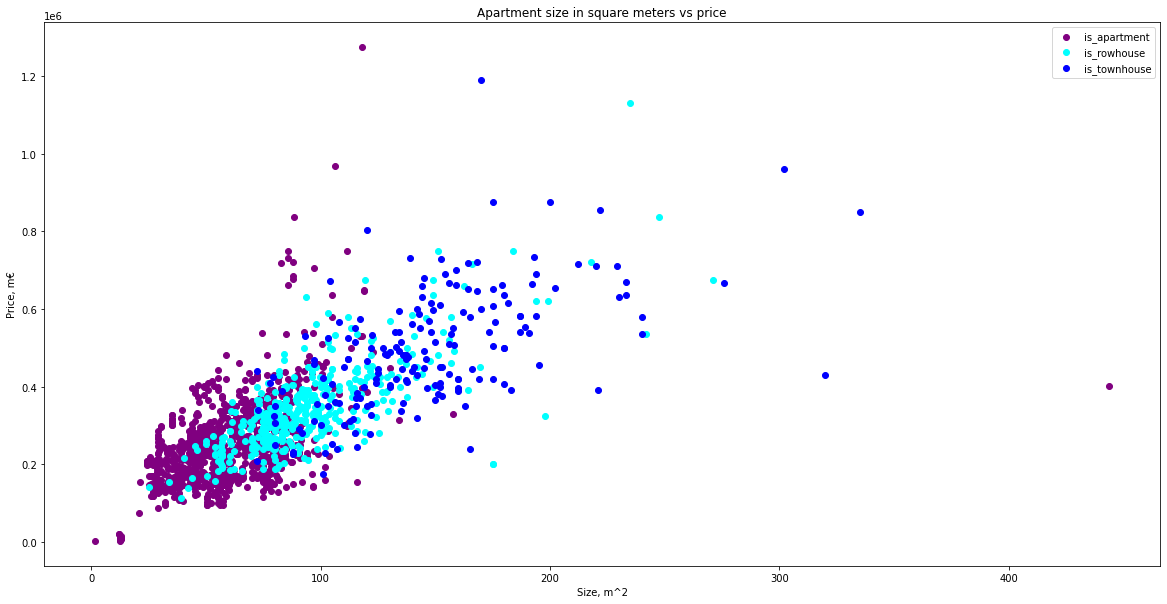

In [95]:
fig, ax = plt.subplots(figsize=(20, 10))
house_type_colors = {
    'is_apartment': 'purple',
    'is_rowhouse': 'cyan',
    'is_townhouse': 'blue'
}
for house_type in ["is_apartment", "is_rowhouse", "is_townhouse"]:
    type_data = data[data[house_type] == 1]
    ax.scatter(type_data["square_meters"], type_data["price_including_loans"], color=house_type_colors[house_type], label=house_type)
    
plt.title("Apartment size in square meters vs price")
plt.ylabel("Price, m€")
plt.xlabel("Size, m^2")
plt.legend()

### Thoughts on square meters vs price
- Well, less suprisingly, there seems to be a big dependency between the size and the price of the apartment.
- townhouses tend to be bigger than rowhouses and rowhouses tend to be bigger than apartments
- the bigger the house the more variance there is in the price

Text(0.5, 0, 'Size, m^2')

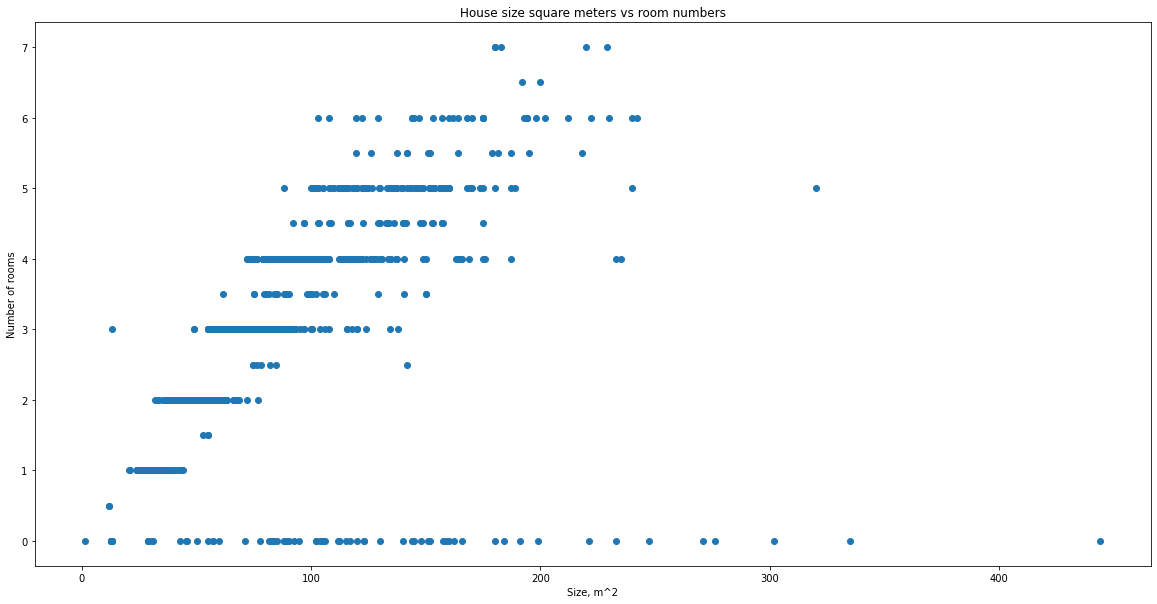

In [93]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(data["square_meters"], data["number_of_rooms"])
    
plt.title("Apartment size square meters vs room numbers")
plt.ylabel("Number of rooms")
plt.xlabel("Size, m^2")

### Thoughts on apartment size vs room numbers
- quite a lot of 0s in there, might need some extra cleaning on the wrangling part?
- looks like there is a pretty linear dependency between number of rooms and size, which is again unsuprising


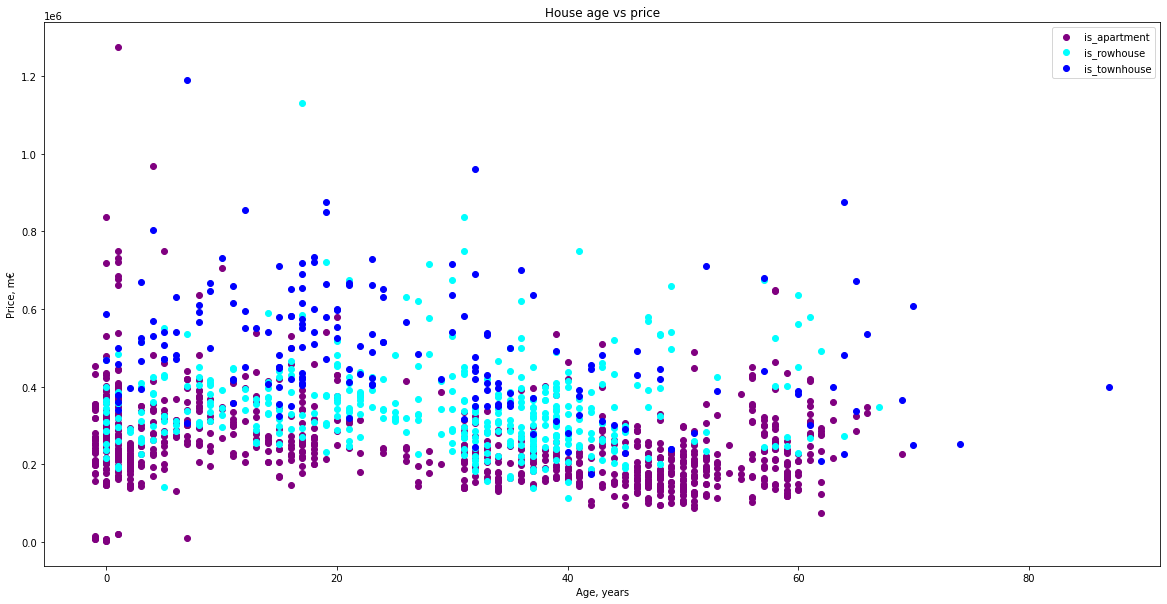

In [97]:
fig, ax = plt.subplots(figsize=(20, 10))
house_type_colors = {
    'is_apartment': 'purple',
    'is_rowhouse': 'cyan',
    'is_townhouse': 'blue'
}
for house_type in ["is_apartment", "is_rowhouse", "is_townhouse"]:
    type_data = data[data[house_type] == 1]
    ax.scatter(type_data["age"], type_data[ "price_including_loans"], color=house_type_colors[house_type], label=house_type)
    
plt.title("House age vs price")
plt.ylabel("Price, m€")
plt.xlabel("Age, years")
plt.legend()

### Thoughts on age vs price
- well, rather surprisingly, apartment age does not seem to correlate with its price

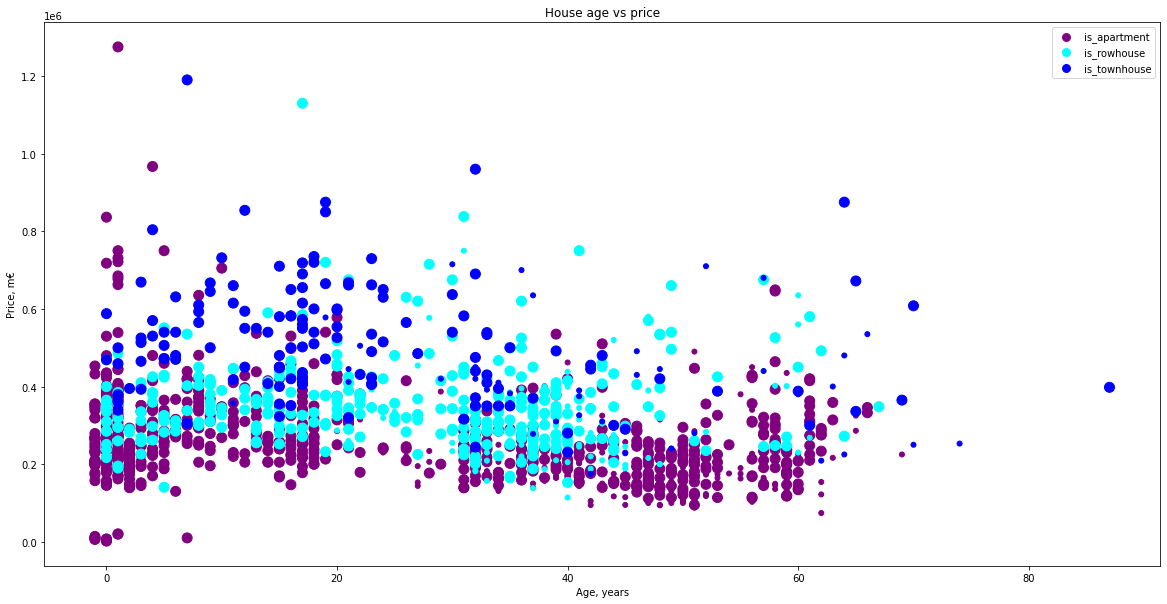

In [102]:
fig, ax = plt.subplots(figsize=(20, 10))
house_type_colors = {
    'is_apartment': 'purple',
    'is_rowhouse': 'cyan',
    'is_townhouse': 'blue'
}

for house_type in ["is_apartment", "is_rowhouse", "is_townhouse"]:
    type_data = data[data[house_type] == 1]
    scale = 25 + (75 * type_data["shape_is_good"])
    ax.scatter(type_data["age"], type_data[ "price_including_loans"], color=house_type_colors[house_type], label=house_type, s=scale)
    
plt.title("House age vs price")
plt.ylabel("Price, m€")
plt.xlabel("Age, years")
plt.legend()

In [111]:
f'C{data["lot_is_owned"].iloc[0]}'

'C0'

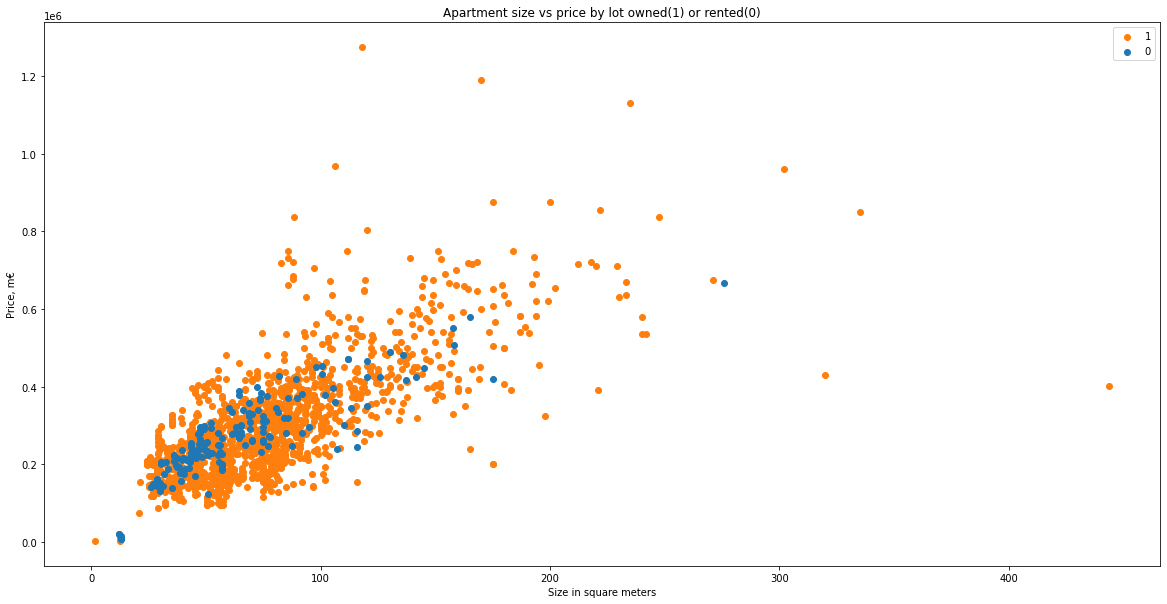

In [118]:
fig, ax = plt.subplots(figsize=(20, 10))

for house_type in [1, 0]:
    type_data = data[data["lot_is_owned"] == house_type]
    ax.scatter(type_data["square_meters"], type_data[ "price_including_loans"], c=f'C{type_data["lot_is_owned"].iloc[0]}', label=house_type)
    
plt.title("Apartment size vs price by lot owned(1) or rented(0)")
plt.ylabel("Price, m€")
plt.xlabel("Size in square meters")
plt.legend()

## Do regression!

In [123]:
data.columns

Index(['neighborhood', 'room_arrangement', 'house_type', 'square_meters',
       'price_including_loans', 'price_per_square_meters', 'built_in', 'floor',
       'has_elevator', 'shape', 'lot', 'energy_classification',
       'number_of_rooms', 'shape_is_good', 'age', 'is_apartment',
       'is_rowhouse', 'is_townhouse', 'lot_is_owned'],
      dtype='object')

In [128]:
x = data[['square_meters', 'has_elevator', 'shape_is_good', 'age', 'is_apartment','is_rowhouse', 'is_townhouse', 'lot_is_owned']]
y = data["price_including_loans"]


In [131]:

model = LinearRegression().fit(x, y)

In [132]:
model.coef_

array([  2452.05887317,  18811.84142301,  52623.93909057,  -1667.76234621,
       -19570.90476774,  -1099.4497617 ,  20670.35452944,  56778.17483555])

In [135]:
candidate_apartment = np.array([110, 0, 1, 19, 0, 1, 0, 1]).reshape(1, -1)
model.predict(candidate_apartment)

array([413058.40405106])

## Only rowhouses!

In [137]:
rowhouse_data = data[data["is_rowhouse"] == 1]
rw_x = rowhouse_data[['square_meters', 'shape_is_good', 'age', 'lot_is_owned']]
rw_y = rowhouse_data["price_including_loans"]

In [138]:
rowhouse_model = LinearRegression().fit(rw_x, rw_y)

In [139]:
rowhouse_model.coef_

array([ 2753.29249109, 43836.18980668, -1138.74028551, 34659.91811968])

In [143]:
candidate_rowhouse = np.array([110, 1, 19, 1]).reshape(1, -1)
rowhouse_model.predict(candidate_rowhouse)

array([409414.70518114])

## Plot candidate

In [156]:
rowhouse_data = data[data["is_rowhouse"] == 1]
rw_sq_x = np.array(rowhouse_data['square_meters']).reshape(-1, 1)
rw_sq_y = rowhouse_data["price_including_loans"]
rowhouse_square_meter_model = LinearRegression().fit(rw_sq_x, rw_sq_y)

In [163]:
rw_coef = rowhouse_square_meter_model.coef_
rw_intercept = rowhouse_square_meter_model.intercept_

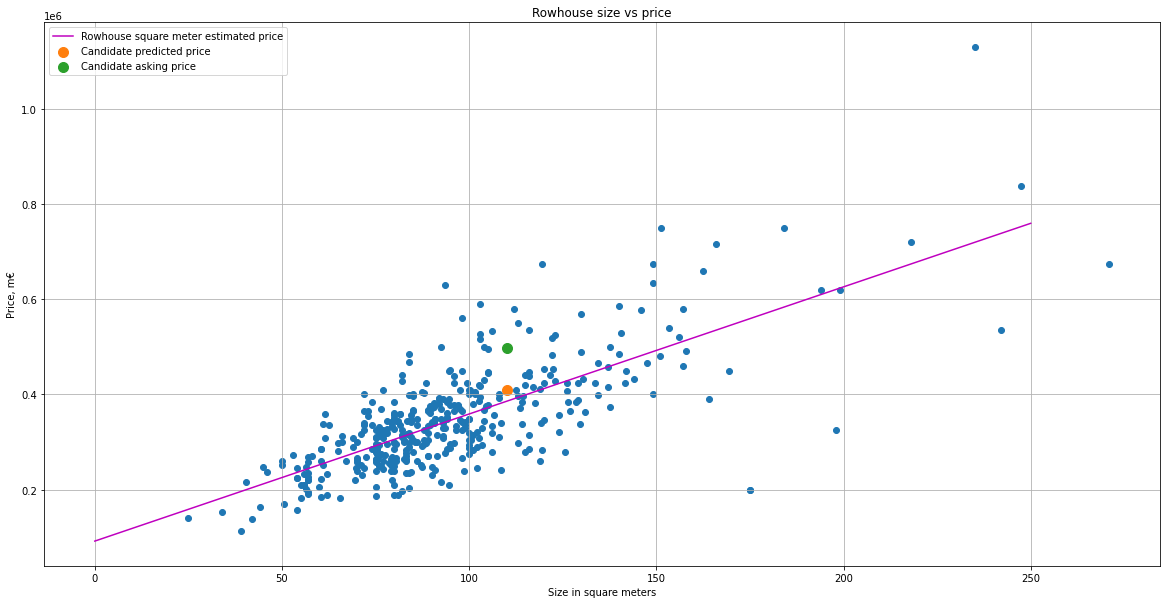

In [164]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(rowhouse_data["square_meters"], rowhouse_data[ "price_including_loans"])
ax.scatter(110, 409414, label="Candidate predicted price", s=100)
ax.scatter(110, 498367, label="Candidate asking price", s=100)
plt.plot((0, 250), (rw_intercept, 250*rw_coef + rw_intercept), c='m', label="Rowhouse square meter estimated price")

plt.title("Rowhouse size vs price")
plt.ylabel("Price, m€")
plt.xlabel("Size in square meters")
plt.grid(True)
plt.legend()